## ANZ data analysis

Importing all the necessary packages:

In [1]:
# common data sci lib
import pandas as pd
import numpy as np

In [2]:
# to avoid warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Visualisation lib
import seaborn as sns
import matplotlib.pyplot as plt

Read in the dataset

In [4]:
df = pd.read_csv('/Users/aditya/Downloads/Insidesherpa internships/ANZ/anz.csv')

In [5]:
df

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit


So right from the first glance at the data, we can notice that:
1. There are 12043 rows and 23 columns
2. There are a lot of Nan values
3. There is integer data, float data, string data, and probably some other data types.

Lets start the analysis

In [6]:
# show columns
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [7]:
df.info()  # more info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  7717 non-null   float64
 2   bpay_biller_code   885 non-null    object 
 3   account            12043 non-null  object 
 4   currency           12043 non-null  object 
 5   long_lat           12043 non-null  object 
 6   txn_description    12043 non-null  object 
 7   merchant_id        7717 non-null   object 
 8   merchant_code      883 non-null    float64
 9   first_name         12043 non-null  object 
 10  balance            12043 non-null  float64
 11  date               12043 non-null  object 
 12  gender             12043 non-null  object 
 13  age                12043 non-null  int64  
 14  merchant_suburb    7717 non-null   object 
 15  merchant_state     7717 non-null   object 
 16  extraction         120

So we can see that most of the data is of object type. We have to manage these later according to our needs. 

In [8]:
df.describe()  # data statistics

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [9]:
# null counts
df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

Here we can see that 'bpay_biller_code' and 'merchant_code' have their majority entries as null values. So lets check what these columns contain and then we can analyse how to deal with them.

In [10]:
df.bpay_biller_code.unique() #show unique values in the column

array([nan, '0', ' THE DISCOUNT CHEMIST GROUP',
       ' LAND WATER & PLANNING East Melbourne'], dtype=object)

In [11]:
df.bpay_biller_code.value_counts()  #show the value count in the column

0                                        883
 LAND WATER & PLANNING East Melbourne      1
 THE DISCOUNT CHEMIST GROUP                1
Name: bpay_biller_code, dtype: int64

Clearly, most of the values are 0. There are only two values that point to some actual entry; and the rest of the values are empty.
So we can drop this column as this data is insignificant to us.

In [12]:
df.drop(['bpay_biller_code'],axis=1, inplace=True)

The next column with highest empty values is merchant_code. Lets check what this column contains.

In [13]:
df.merchant_code.unique()

array([nan,  0.])

In [14]:
df.merchant_code.value_counts()

0.0    883
Name: merchant_code, dtype: int64

(array([  0.,   0.,   0.,   0.,   0., 883.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

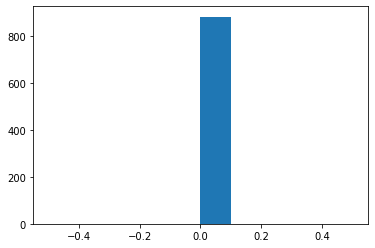

In [15]:
plt.hist(df['merchant_code'])

So clearly, there is only one value, ie., 0, which occurs 883 times. 
All the other values are empty.
So we can drop this column too.

In [16]:
df.drop(['merchant_code'],axis=1, inplace=True)

In [17]:
df.isnull().sum()

status                  0
card_present_flag    4326
account                 0
currency                0
long_lat                0
txn_description         0
merchant_id          4326
first_name              0
balance                 0
date                    0
gender                  0
age                     0
merchant_suburb      4326
merchant_state       4326
extraction              0
amount                  0
transaction_id          0
country                 0
customer_id             0
merchant_long_lat    4326
movement                0
dtype: int64

Now we have 5 more columns left which have null values in them. One thing to notice here is that all of these columns have the same no of null values, i.e., 4326. There is a possibilty that these might be from the same rows. And if that is the case, we can simply drop those rows alone.

In [18]:
import missingno as msno

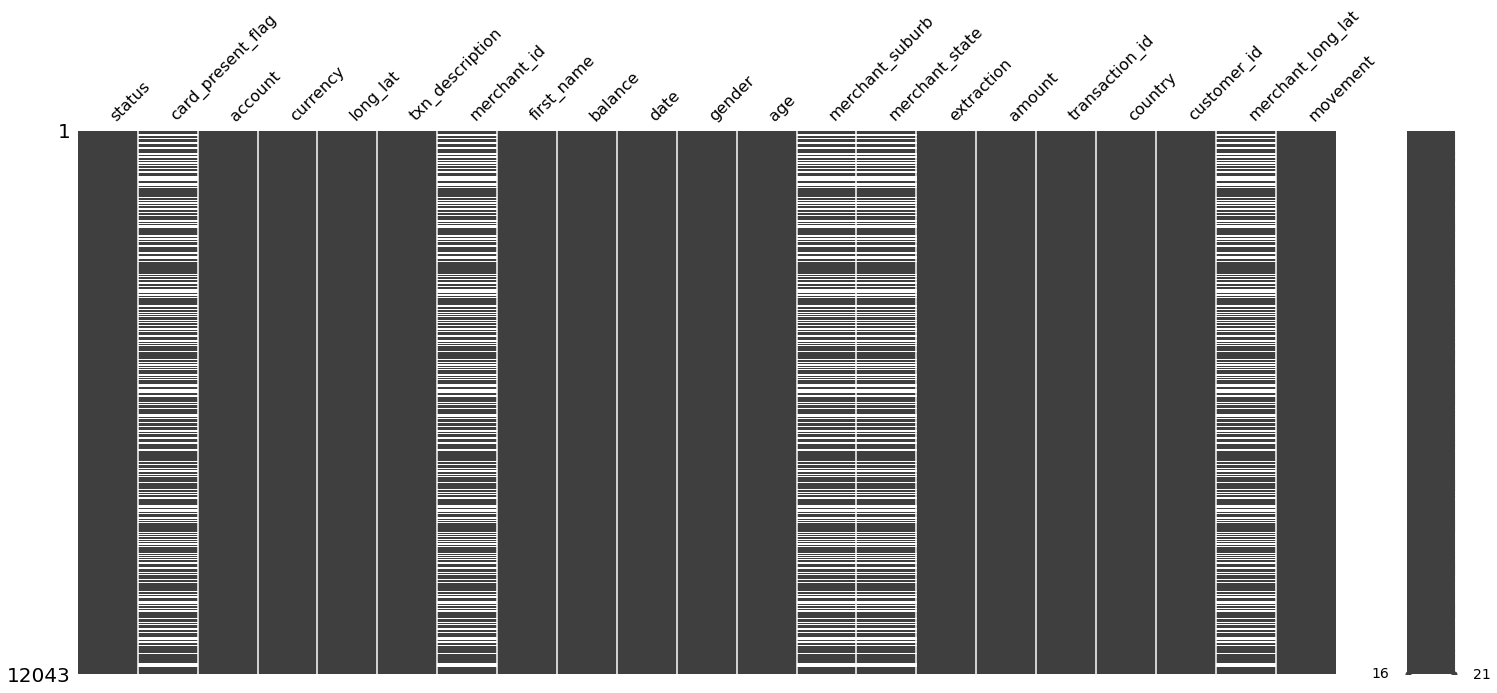

In [19]:
msno.matrix(df)

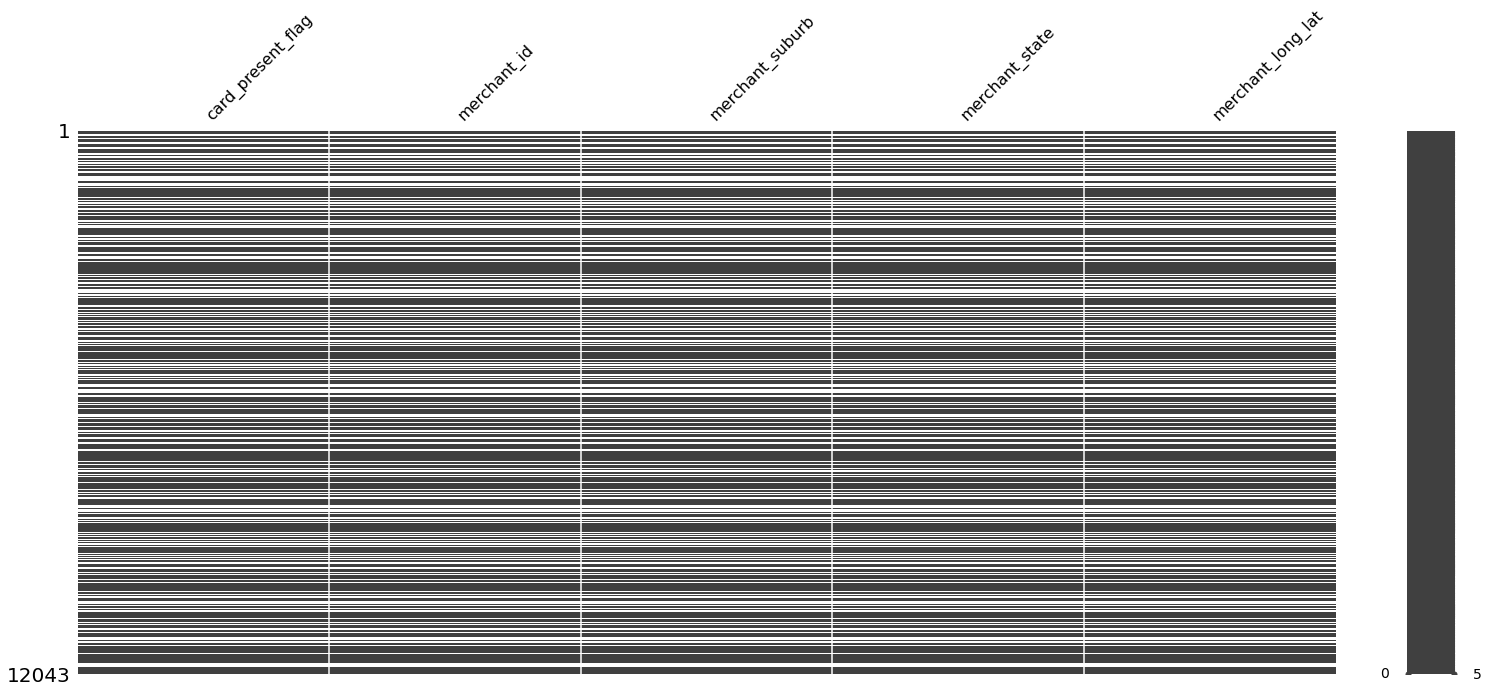

In [20]:
msno.matrix(df[['card_present_flag','merchant_id','merchant_suburb','merchant_state','merchant_long_lat']])

It is clear that the null values in all the 5 columns correspond to the same rows. However we cannot simply drop these rows as of now because it might have an effect on the rows of rest of the columns.

For checking if deleting these rows will have any effect on the dataset's performance or not, lets see if we lose any important information from other columns' rows whose corresponding row has these null values.
So lets start with 'status' column. 

In [21]:
df.status.value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

Clearly, 'status' column has only two values- authorized and posted. This makes our work easy because we can now easily find out if we are going to lose one value totally upon deleting those null rows.

In [22]:
x = 0
y = 0
for i in range(len(df)):
    if (df['card_present_flag'][i]/1 != df['card_present_flag'][i]):
        if (df['status'][i]=="authorized"):
            x = x+1
        if (df['status'][i]=="posted"):
            y = y+1
        
if x!=0:
    print("Got", x, "authorized values")
else:
    print("authorized not found")
    
if y!=0:
    print("Got", y, "posted values")
else:
    print("posted not found")

authorized not found
Got 4326 posted values


We can see that we got all the 4326 'posted' values back but no 'authorized'.
So clearly, deleting those rows would result in the loss of all the 'posted' values.

Lets check the same with 'txn_description' column.

In [23]:
df.txn_description.value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [24]:
a=0
b=0
c=0
d=0
e=0
f=0

for i in range(len(df)):
    if (df['card_present_flag'][i]/1 != df['card_present_flag'][i]):
        if (df['txn_description'][i]=="SALES-POS"):
            a = a+1
        if (df['txn_description'][i]=="POS"):
            b=b+1
        if (df['txn_description'][i]=="PAYMENT"):
            c=c+1
        if (df['txn_description'][i]=="PAY/SALARY"):
            d=d+1
        if (df['txn_description'][i]=="INTER BANK"):
            e=e+1
        if (df['txn_description'][i]=="PHONE BANK"):
            f=f+1
        
        
if a==0:
    print("SALES-POS not found")
if b==0:
    print("POS not found")
if c==0:
    print("PAYMENT not found")
if d==0:
    print("PAY/SALARY not found")
if e==0:
    print("INTER BANK not found")
if f==0:
    print("PHONE BANK not found")

SALES-POS not found
POS not found


Here we are loosing the two values that are highest in frequency in the txn_description column.

**Hence, the conclusion is that we cannot simply delete the the null values directly although all of them fall under the same corresponding rows.**

Now lets just visualise how our data looks like.

In [34]:
cat=df[['status','currency','txn_description','first_name','gender','merchant_state','country','movement']]
num=df.select_dtypes(exclude='object')

In [35]:
num

,card_present_flag,balance,age,amount
0,1.0,35.39,26,16.25
1,0.0,21.20,26,14.19
2,1.0,5.71,38,6.42
3,1.0,2117.22,40,40.90
4,1.0,17.95,26,3.25
...,...,...,...,...
12038,0.0,14054.14,30,9.79
12039,1.0,9137.79,20,63.87
12040,1.0,45394.57,28,43.96
12041,1.0,11350.67,69,30.77


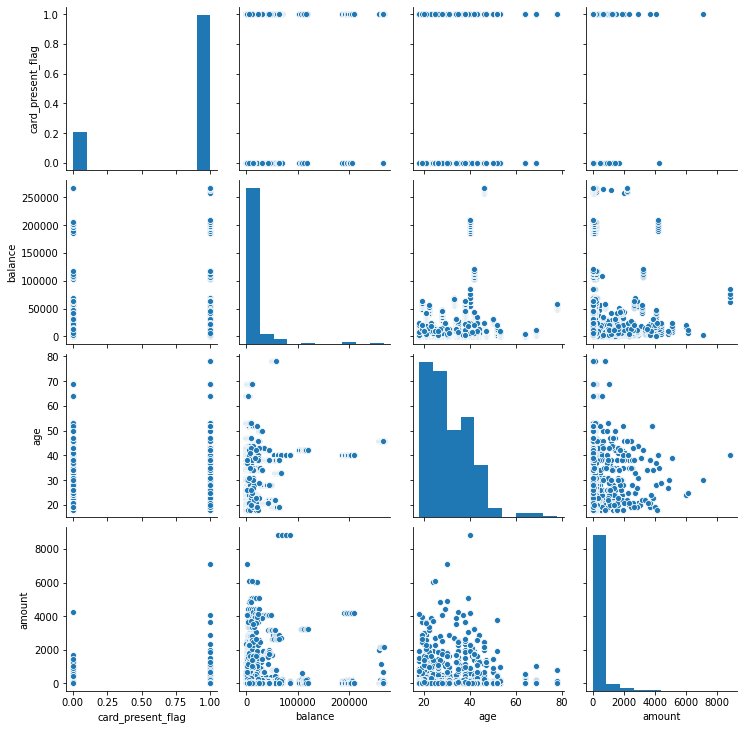

In [36]:
sns.pairplot(num)

                   card_present_flag   balance       age    amount
card_present_flag           1.000000  0.005925 -0.008405 -0.002074
balance                     0.005925  1.000000  0.199329  0.059178
age                        -0.008405  0.199329  1.000000  0.029980
amount                     -0.002074  0.059178  0.029980  1.000000


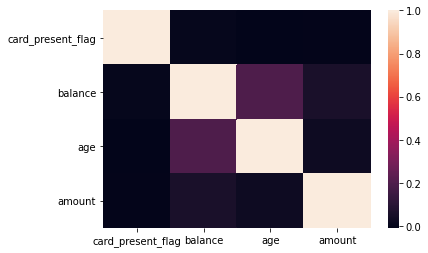

In [126]:
print(num.corr())
sns.heatmap(num.corr())

From the pairplot and the heatmap, it is certain that age, amount and balance are lowly correlated with each other.

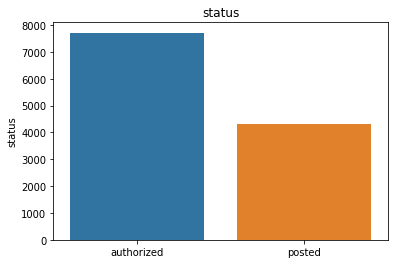

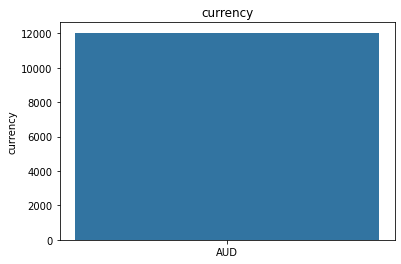

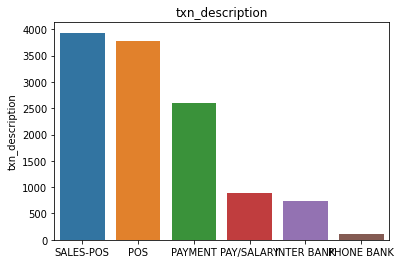

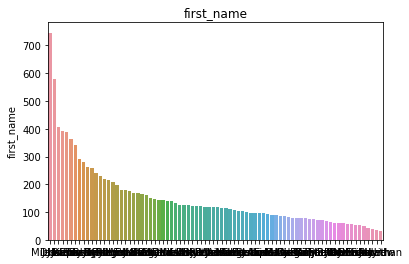

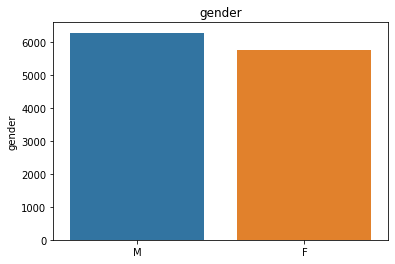

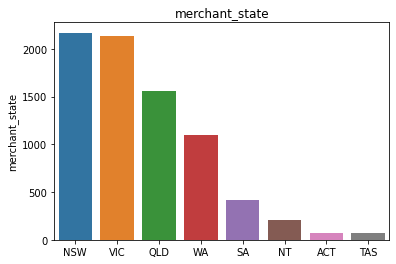

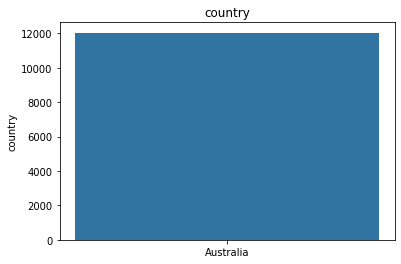

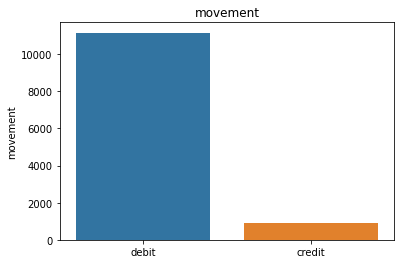

In [38]:
for i in cat.columns:
    sns.barplot(cat[i].value_counts().index,cat[i].value_counts()).set_title(i)
    plt.show()

We can see that there are single values in 'country' and 'currency' columns. Hence, we can delete these two columns.

In [39]:
df.drop(['currency','country'],axis=1,inplace=True)

In [40]:
df

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,8/1/18,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,8/1/18,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,8/1/18,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,8/1/18,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,8/1/18,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,ACC-3021093232,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,Melissa,14054.14,10/31/18,F,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,ACC-1608363396,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,Robert,9137.79,10/31/18,M,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,ACC-3827517394,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,Craig,45394.57,10/31/18,M,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,ACC-2920611728,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,Tyler,11350.67,10/31/18,M,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,CUS-1388323263,145.09 -37.91,debit


Lets start analyzing each column individually.

### Column : Status

In [41]:
df.status.unique()

array(['authorized', 'posted'], dtype=object)

In [42]:
df.status.value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

(array([7717.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4326.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

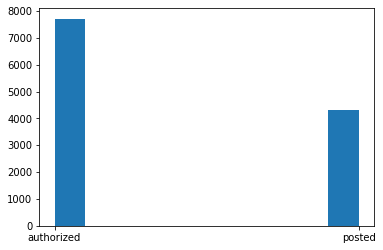

In [43]:
plt.hist(df['status'])

The distribution is fairly alright. And because there are only two values here, we can label encode them later while performing any ML algo.

### Column : card_present_flag

In [44]:
df.card_present_flag.unique()

array([ 1.,  0., nan])

In [45]:
df.card_present_flag.value_counts()

1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64

(array([1523.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6194.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

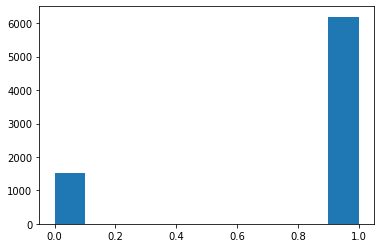

In [46]:
plt.hist(df['card_present_flag'])

This column is not uniform. We'll have to see later if it makes any significant difference on the dataset as a whole.

### Column : account

In [47]:
#df['card_present_flag'] = df['card_present_flag'].replace(1.0,'True').replace(0.0,'False')

In [48]:
df.account.value_counts()

ACC-1598451071    578
ACC-1222300524    303
ACC-182446574     292
ACC-4258502723    260
ACC-1037050564    259
                 ... 
ACC-1998563091     40
ACC-3881031190     37
ACC-721712940      34
ACC-4059612845     31
ACC-1217063613     25
Name: account, Length: 100, dtype: int64

Clearly, these are the 100 unique account nos. of probably 100 unique customers. This column thus has high cardinality. 
We can drop this column as this doesnt add anything important to our analysis going further and therefore is only going to increase the noise in our data if not removed.

In [49]:
df.drop(['account'],axis=1,inplace=True)

### Column : long_lat

In [52]:
df.long_lat.value_counts()

153.41 -27.95    578
151.23 -33.94    303
116.06 -32.00    292
145.45 -37.74    260
153.10 -27.66    259
                ... 
149.03 -35.25     40
149.19 -21.15     37
145.09 -37.82     34
130.98 -12.49     31
147.61 -37.82     25
Name: long_lat, Length: 100, dtype: int64

To work with these values, we need to first unpack them into separate longitude and latitude values. After that, we'll plot them on the map to see where these points lie in the world.

In [53]:
# new data frame with split value columns 
co_ordinates = df["long_lat"].str.split(" ", n = 1, expand = True) 
  
# making separate first name column from new data frame 
df["longitude"]= co_ordinates[0] 
  
# making separate last name column from new data frame 
df["latitude"]= co_ordinates[1] 

In [54]:
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)

In [55]:
df

,status,card_present_flag,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,longitude,latitude
0,authorized,1.0,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,8/1/18,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit,153.41,-27.95
1,authorized,0.0,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,8/1/18,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit,153.41,-27.95
2,authorized,1.0,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,8/1/18,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit,151.23,-33.94
3,authorized,1.0,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,8/1/18,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,CUS-1614226872,153.05 -26.68,debit,153.10,-27.66
4,authorized,1.0,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,8/1/18,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,CUS-2487424745,153.44 -28.06,debit,153.41,-27.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,Melissa,14054.14,10/31/18,F,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,CUS-55310383,145.23 -37.81,debit,149.83,-29.47
12039,authorized,1.0,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,Robert,9137.79,10/31/18,M,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,CUS-2688605418,150.88 -33.96,debit,151.22,-33.87
12040,authorized,1.0,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,Craig,45394.57,10/31/18,M,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,CUS-2663907001,150.92 -33.74,debit,151.12,-33.89
12041,authorized,1.0,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,Tyler,11350.67,10/31/18,M,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,CUS-1388323263,145.09 -37.91,debit,144.96,-37.76


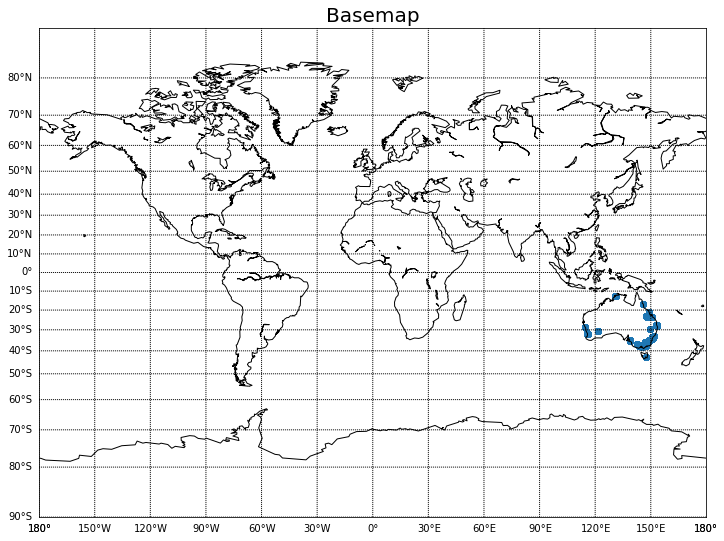

In [56]:
from mpl_toolkits.basemap import Basemap
fig = plt.figure(figsize=(12,9))
m = Basemap(projection='mill',
           llcrnrlat = -90,
           urcrnrlat = 90,
           llcrnrlon = -180,
           urcrnrlon = 180,
           resolution = 'c')
m.drawcoastlines()
m.drawparallels(np.arange(-90,90,10),labels=[True,False,False,False])
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1])
sites_lat_y = df['latitude'].tolist()
sites_lon_x = df['longitude'].tolist()
m.scatter(sites_lon_x,sites_lat_y,latlon=True)
plt.title('Basemap', fontsize=20)
plt.show()

It is clear from the map that the points lie in Australia, especially the coastal areas. 

We longer need the 'long_lat' column as longitude and latitude columns are added to the dataframe separately.

In [57]:
df.drop(['long_lat'],axis=1,inplace=True)

### Column : txn_description

In [58]:
df.txn_description.unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

In [59]:
df.txn_description.value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

(array([3783.,    0., 3934.,    0., 2600.,    0.,  742.,    0.,  883.,
         101.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

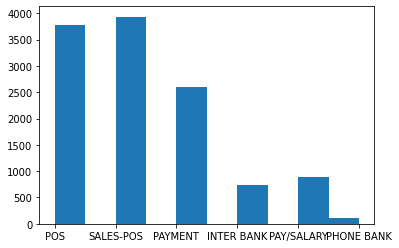

In [60]:
plt.hist(df['txn_description'])

These have to encoded in some way before we do any kind of machine learning with the data. But for now, let's move on to the next column.

### Column : merchant_id

In [61]:
df.merchant_id.value_counts()

106e1272-44ab-4dcb-a438-dd98e0071e51    14
6c84c219-96ea-4c6f-9de5-0a28bcaec62f    12
e28c426d-cbef-4e2d-aa06-1ba0b6b1902f    11
aef30de1-c67e-4ab7-8577-2931a4bf3c7e    10
6ddddc40-5b69-4253-8a26-167999a8bf96    10
                                        ..
de2bf089-d4a7-4fc4-8428-a50643217748     1
f5c25f89-43a5-478f-9890-78d3e726520d     1
ceffdb95-20cb-44ac-a651-8d3f14da18a1     1
c9eea420-8414-40c3-bb4a-104465d3a461     1
ef1a4ced-eff5-43d0-80b6-f5ef33a45db2     1
Name: merchant_id, Length: 5725, dtype: int64

These have very high cardinality and we dont need this column anyway because it doesnt add much value to our analysis.

In [62]:
df.drop(["merchant_id"],axis=1,inplace=True)

### Column : first_name

In [63]:
df.first_name.value_counts()

Michael      746
Diana        578
Jessica      408
Joseph       391
Jeffrey      388
            ... 
Cindy         51
Elizabeth     44
David         40
Andrew        34
Jonathan      31
Name: first_name, Length: 80, dtype: int64

(array([2429., 1752., 1652., 1063., 1171.,  997., 1046.,  573.,  609.,
         751.]),
 array([ 0. ,  7.9, 15.8, 23.7, 31.6, 39.5, 47.4, 55.3, 63.2, 71.1, 79. ]),
 <a list of 10 Patch objects>)

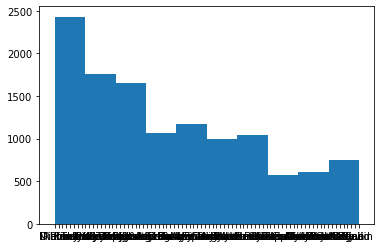

In [64]:
plt.hist(df['first_name'])

The distribution is decent.

### Column : balance

In [65]:
df.balance.value_counts()

1204.08    2
2786.80    2
2773.11    2
4007.96    2
834.47     2
          ..
6112.31    1
7215.07    1
4010.02    1
2005.82    1
0.25       1
Name: balance, Length: 12006, dtype: int64

(array([1.0751e+04, 6.9000e+02, 3.1300e+02, 2.1000e+01, 5.0000e+01,
        0.0000e+00, 7.0000e+00, 1.4400e+02, 0.0000e+00, 6.7000e+01]),
 array([2.40000000e-01, 2.67130680e+04, 5.34258960e+04, 8.01387240e+04,
        1.06851552e+05, 1.33564380e+05, 1.60277208e+05, 1.86990036e+05,
        2.13702864e+05, 2.40415692e+05, 2.67128520e+05]),
 <a list of 10 Patch objects>)

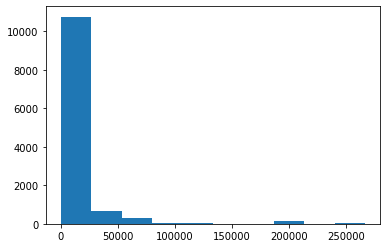

In [66]:
plt.hist(df['balance'])

There seems to be some outliers in the column. Lets check and correct them accordingly.

In [67]:
df.balance.max()

267128.52

In [68]:
perc =[.80,.90,.99] 
df.balance.describe(percentiles=perc)

count     12043.000000
mean      14704.195553
std       31503.722652
min           0.240000
50%        6432.010000
80%       15638.020000
90%       29442.384000
99%      201963.445200
max      267128.520000
Name: balance, dtype: float64

In [69]:
df=df[df['balance']<100000]

(array([7537., 2323.,  883.,  246.,  257.,  170.,  167.,  150.,   21.,
           8.]),
 array([2.4000000e-01, 8.5892450e+03, 1.7178250e+04, 2.5767255e+04,
        3.4356260e+04, 4.2945265e+04, 5.1534270e+04, 6.0123275e+04,
        6.8712280e+04, 7.7301285e+04, 8.5890290e+04]),
 <a list of 10 Patch objects>)

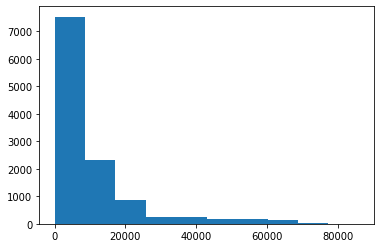

In [70]:
plt.hist(df['balance'])

Now it looks better.

### Column : date

In [71]:
df.date.value_counts()

8/17/18     172
9/28/18     172
10/5/18     163
9/14/18     159
10/17/18    159
           ... 
8/6/18       95
10/23/18     95
10/8/18      93
8/20/18      93
10/30/18     87
Name: date, Length: 91, dtype: int64

In [72]:
type(df.date[0])

str

Since this is str type variable, we need to convert it to datetime format first, and then we'll extract out the month and year from it.

In [73]:
df['date']= pd.to_datetime(df['date']) 
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day
#Extracting names for easier analysis later
df['day_name'] = df['date'].dt.day_name()
df['month_name'] = df['date'].dt.month_name()

In [74]:
df

,status,card_present_flag,txn_description,first_name,balance,date,gender,age,merchant_suburb,merchant_state,...,customer_id,merchant_long_lat,movement,longitude,latitude,year,month,day,day_name,month_name
0,authorized,1.0,POS,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,...,CUS-2487424745,153.38 -27.99,debit,153.41,-27.95,2018,8,1,Wednesday,August
1,authorized,0.0,SALES-POS,Diana,21.20,2018-08-01,F,26,Sydney,NSW,...,CUS-2487424745,151.21 -33.87,debit,153.41,-27.95,2018,8,1,Wednesday,August
2,authorized,1.0,POS,Michael,5.71,2018-08-01,M,38,Sydney,NSW,...,CUS-2142601169,151.21 -33.87,debit,151.23,-33.94,2018,8,1,Wednesday,August
3,authorized,1.0,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,...,CUS-1614226872,153.05 -26.68,debit,153.10,-27.66,2018,8,1,Wednesday,August
4,authorized,1.0,SALES-POS,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,...,CUS-2487424745,153.44 -28.06,debit,153.41,-27.95,2018,8,1,Wednesday,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,POS,Melissa,14054.14,2018-10-31,F,30,Ringwood,VIC,...,CUS-55310383,145.23 -37.81,debit,149.83,-29.47,2018,10,31,Wednesday,October
12039,authorized,1.0,SALES-POS,Robert,9137.79,2018-10-31,M,20,Casula,NSW,...,CUS-2688605418,150.88 -33.96,debit,151.22,-33.87,2018,10,31,Wednesday,October
12040,authorized,1.0,POS,Craig,45394.57,2018-10-31,M,28,Kings Park,NSW,...,CUS-2663907001,150.92 -33.74,debit,151.12,-33.89,2018,10,31,Wednesday,October
12041,authorized,1.0,SALES-POS,Tyler,11350.67,2018-10-31,M,69,Oakleigh,VIC,...,CUS-1388323263,145.09 -37.91,debit,144.96,-37.76,2018,10,31,Wednesday,October


In [75]:
df.year.value_counts()

2018    11762
Name: year, dtype: int64

In [76]:
df.drop(['date','year'],axis=1,inplace=True)

In [77]:
df.month.value_counts()

10    3976
9     3921
8     3865
Name: month, dtype: int64

Conclusion: This is a three months data from 2018.
(we'll do a proper analysis later)

### Column : gender

(array([5607.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6155.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

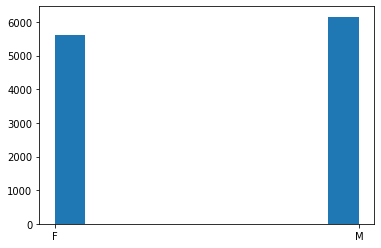

In [78]:
plt.hist(df['gender'])

This is a good distribution.

### Column : age

(array([3341., 3131., 1874., 2000.,  998.,  194.,    0.,   88.,  102.,
          34.]),
 array([18., 24., 30., 36., 42., 48., 54., 60., 66., 72., 78.]),
 <a list of 10 Patch objects>)

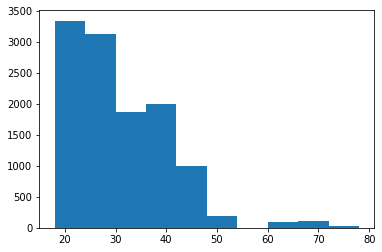

In [79]:
plt.hist(df.age)

### Column : merchant_suburbs

In [80]:
df.merchant_suburb.value_counts()

Melbourne        251
Sydney           230
Southport         82
Brisbane City     79
Chatswood         54
                ... 
Blackwood          1
Carmel             1
Junee              1
Rosemeadow         1
Bucasia            1
Name: merchant_suburb, Length: 1587, dtype: int64

This column has very high cardinality and not much for us. Even if we wanted to know the exact locations, we have the longitude and latitude values. Thus we can drop this column.

In [81]:
df.drop(['merchant_suburb'],axis=1,inplace=True)

### Column : merchant_state

In [82]:
df.merchant_state.unique()

array(['QLD', 'NSW', nan, 'VIC', 'WA', 'SA', 'NT', 'TAS', 'ACT'],
      dtype=object)

In [83]:
df.merchant_state.value_counts()

NSW    2153
VIC    2044
QLD    1538
WA     1100
SA      414
NT      205
ACT      73
TAS      65
Name: merchant_state, dtype: int64

This is an important column as we'll need it for analysis to identify potential states that could be targeted by the company for better marketing strategies.

### Column : extraction

In [84]:
df.extraction.value_counts()

2018-10-02T17:00:00.000+0000    9
2018-08-28T17:00:00.000+0000    9
2018-09-03T11:00:00.000+0000    9
2018-08-07T17:00:00.000+0000    9
2018-09-04T17:00:00.000+0000    9
                               ..
2018-10-26T09:06:47.000+0000    1
2018-08-28T12:47:59.000+0000    1
2018-09-19T10:09:49.000+0000    1
2018-10-28T13:02:10.000+0000    1
2018-09-10T05:00:00.000+0000    1
Name: extraction, Length: 9304, dtype: int64

In [85]:
type(df.extraction[0])

str

In [86]:
import datetime

In [87]:
df['time'] = pd.to_datetime(df['extraction'])

In [88]:
# extracting time from timestamp
df['time'] = [datetime.datetime.time(d) for d in df['time']] 

In [89]:
df

,status,card_present_flag,txn_description,first_name,balance,gender,age,merchant_state,extraction,amount,...,customer_id,merchant_long_lat,movement,longitude,latitude,month,day,day_name,month_name,time
0,authorized,1.0,POS,Diana,35.39,F,26,QLD,2018-08-01T01:01:15.000+0000,16.25,...,CUS-2487424745,153.38 -27.99,debit,153.41,-27.95,8,1,Wednesday,August,01:01:15
1,authorized,0.0,SALES-POS,Diana,21.20,F,26,NSW,2018-08-01T01:13:45.000+0000,14.19,...,CUS-2487424745,151.21 -33.87,debit,153.41,-27.95,8,1,Wednesday,August,01:13:45
2,authorized,1.0,POS,Michael,5.71,M,38,NSW,2018-08-01T01:26:15.000+0000,6.42,...,CUS-2142601169,151.21 -33.87,debit,151.23,-33.94,8,1,Wednesday,August,01:26:15
3,authorized,1.0,SALES-POS,Rhonda,2117.22,F,40,QLD,2018-08-01T01:38:45.000+0000,40.90,...,CUS-1614226872,153.05 -26.68,debit,153.10,-27.66,8,1,Wednesday,August,01:38:45
4,authorized,1.0,SALES-POS,Diana,17.95,F,26,QLD,2018-08-01T01:51:15.000+0000,3.25,...,CUS-2487424745,153.44 -28.06,debit,153.41,-27.95,8,1,Wednesday,August,01:51:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,POS,Melissa,14054.14,F,30,VIC,2018-10-31T23:09:06.000+0000,9.79,...,CUS-55310383,145.23 -37.81,debit,149.83,-29.47,10,31,Wednesday,October,23:09:06
12039,authorized,1.0,SALES-POS,Robert,9137.79,M,20,NSW,2018-10-31T23:21:46.000+0000,63.87,...,CUS-2688605418,150.88 -33.96,debit,151.22,-33.87,10,31,Wednesday,October,23:21:46
12040,authorized,1.0,POS,Craig,45394.57,M,28,NSW,2018-10-31T23:34:25.000+0000,43.96,...,CUS-2663907001,150.92 -33.74,debit,151.12,-33.89,10,31,Wednesday,October,23:34:25
12041,authorized,1.0,SALES-POS,Tyler,11350.67,M,69,VIC,2018-10-31T23:47:05.000+0000,30.77,...,CUS-1388323263,145.09 -37.91,debit,144.96,-37.76,10,31,Wednesday,October,23:47:05


In [90]:
df.time.value_counts()

17:00:00    410
11:00:00    325
13:00:00    278
14:00:00    259
12:00:00    250
           ... 
11:18:26      1
15:47:08      1
15:03:42      1
14:02:18      1
14:11:43      1
Name: time, Length: 6989, dtype: int64

It is clear that maximum extractions happened after 12 noon; while the highest extractions happened at 5 pm.
So while creating marketing strategies, the company can probably target the clients in that duration.

We do not have any other need from the extraction column anymore. So we can drop it.

In [91]:
df.drop(['extraction','time'],axis=1,inplace=True)

### Column : amount

(array([1.0917e+04, 4.7100e+02, 2.1400e+02, 6.9000e+01, 7.3000e+01,
        9.0000e+00, 4.0000e+00, 0.0000e+00, 1.0000e+00, 4.0000e+00]),
 array([1.000000e-01, 8.836880e+02, 1.767276e+03, 2.650864e+03,
        3.534452e+03, 4.418040e+03, 5.301628e+03, 6.185216e+03,
        7.068804e+03, 7.952392e+03, 8.835980e+03]),
 <a list of 10 Patch objects>)

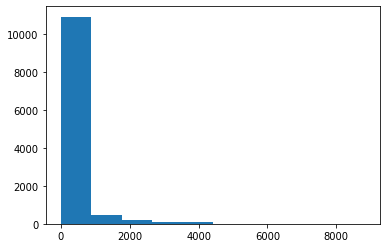

In [92]:
plt.hist(df.amount)

In [93]:
df.amount.max()

8835.98

There seems to be an outlier.

In [94]:
perc =[.80,.90,.99] 
df.amount.describe(percentiles=perc)

count    11762.000000
mean       185.212433
std        584.409609
min          0.100000
50%         28.475000
80%         68.968000
90%        184.818000
99%       3044.184100
max       8835.980000
Name: amount, dtype: float64

In [95]:
df=df[df['amount']<500]

(array([8614., 1270.,  422.,  372.,   52.,   18.,   12.,   12.,   12.,
          10.]),
 array([1.00000e-01, 4.97660e+01, 9.94320e+01, 1.49098e+02, 1.98764e+02,
        2.48430e+02, 2.98096e+02, 3.47762e+02, 3.97428e+02, 4.47094e+02,
        4.96760e+02]),
 <a list of 10 Patch objects>)

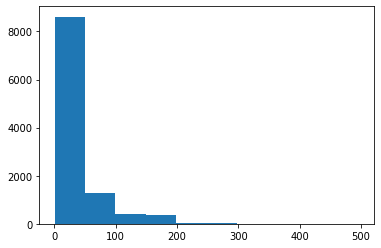

In [96]:
plt.hist(df.amount)

Now we can drop the next two columns as they are of no value.

In [97]:
df.drop(['transaction_id','merchant_long_lat'],axis=1,inplace=True)

### Column : movement

In [98]:
df.movement.value_counts()

debit    10794
Name: movement, dtype: int64

Since the card movement is only through debit card, we dont need this information anymore in our data.

In [99]:
df.drop(['movement'],axis=1,inplace=True)

In [100]:
df

,status,card_present_flag,txn_description,first_name,balance,gender,age,merchant_state,amount,customer_id,longitude,latitude,month,day,day_name,month_name
0,authorized,1.0,POS,Diana,35.39,F,26,QLD,16.25,CUS-2487424745,153.41,-27.95,8,1,Wednesday,August
1,authorized,0.0,SALES-POS,Diana,21.20,F,26,NSW,14.19,CUS-2487424745,153.41,-27.95,8,1,Wednesday,August
2,authorized,1.0,POS,Michael,5.71,M,38,NSW,6.42,CUS-2142601169,151.23,-33.94,8,1,Wednesday,August
3,authorized,1.0,SALES-POS,Rhonda,2117.22,F,40,QLD,40.90,CUS-1614226872,153.10,-27.66,8,1,Wednesday,August
4,authorized,1.0,SALES-POS,Diana,17.95,F,26,QLD,3.25,CUS-2487424745,153.41,-27.95,8,1,Wednesday,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,POS,Melissa,14054.14,F,30,VIC,9.79,CUS-55310383,149.83,-29.47,10,31,Wednesday,October
12039,authorized,1.0,SALES-POS,Robert,9137.79,M,20,NSW,63.87,CUS-2688605418,151.22,-33.87,10,31,Wednesday,October
12040,authorized,1.0,POS,Craig,45394.57,M,28,NSW,43.96,CUS-2663907001,151.12,-33.89,10,31,Wednesday,October
12041,authorized,1.0,SALES-POS,Tyler,11350.67,M,69,VIC,30.77,CUS-1388323263,144.96,-37.76,10,31,Wednesday,October


In [135]:
df.to_csv('df.csv',index=False)

Now that we have explored all our columns in depth, lets get into visualising some trends in the data and draw some inferences from them.